## Project 2

### Due 11/11/25 at 11:55 pm (see Canvas Assignment)

****

## Collaboration policy

This is a group project, and the assignments are available on this Canvas assignment webpage. Please be welcoming and kind to the students in your group (i.e., be a good classmate).

**You may not change groups or work alone.** Any deviations will result in a zero grade. If you have questions about what is allowed or not, you must ask. Saying later that you didn't understand or were unsure is not an acceptable excuse.

In the markdown cell below, put the full name of each person in your group.


### Team members

1. Yuyang Deng
2. put fullname

****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. All team members are responsible for ensuring the AI policy is followed. Remaining silent or failing to check your teammates' work makes you accountable. Be vigilant and review each other's work. If you're unsure about what is permitted, you must ask. Claiming later that you didn't understand or were uncertain is not an acceptable excuse.



****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. dyy12 (730660498)
2. Onyen and PID

****

## Python modules

All the Python modules needed to complete this project are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

****

### Data Clustering using K-means.

The provided dataframe is a $300 \times 2$ matrix of unlabeled data. The columns of the dataframe represent $x$ and $y$ values, and the rows represent data samples.

Tips:
- The introduction to unsupervised learning and k-means slides (see Canvas schedule) may be helpful.
- The matrix decomposition and Principal Component Analysis (PCA) slides (see Canvas schedule) may be helpful.
- Principal component analysis applications.

****

In [28]:
kdf = pd.read_csv("K.csv" )
kdf

,x,y
0,1.249031,0.995507
1,4.446048,1.860954
2,2.829059,2.506758
3,2.259368,-1.571176
4,2.050265,2.264782
...,...,...
295,1.287713,0.483150
296,2.476145,2.297358
297,3.569654,2.024624
298,4.068340,2.732174


****

**P1A** (2 Points): Unlabeled Data Visualization.

<img src="p1a.png" width="600" style="float: right"/>

Using the **kdf** dataframe, visualize the unlabeled data in a 2D plot.

To receive full credit, your plotting solution must generate a scatter plot that is identical to the one provided.

You may assume:
- All the data is used to generate the scatter plot.
- The color used to generate the plot is blue.
- The plot figure size is 9 inches in width and 7 inches in height.
- The default x-axis and y-axis tick values are used.
- The marker shape is **x**.
- The plot grid is enabled.

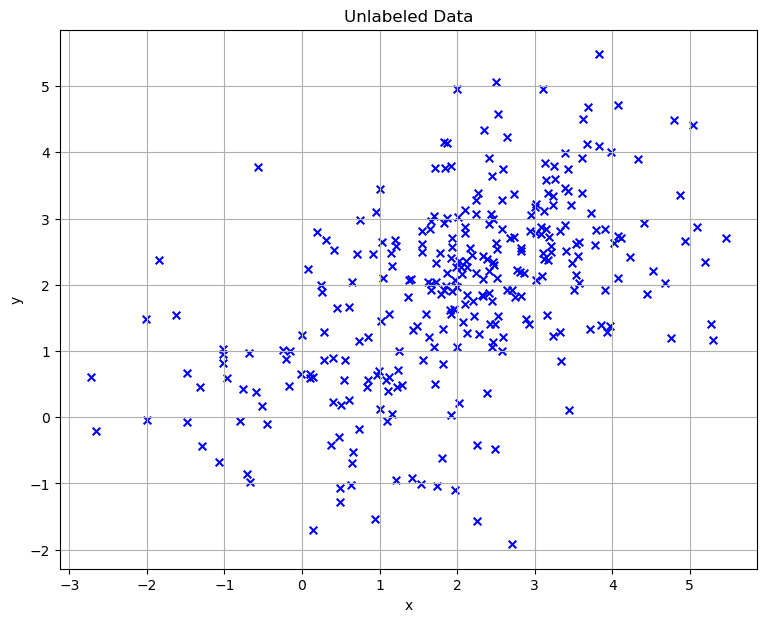

In [29]:
# --------------------------------------
# Add your P1A coding solution below.
# --------------------------------------

fig, axs = plt.subplots(figsize=(9, 7))

axs.scatter(kdf['x'], kdf['y'], s=30, c='blue', marker='x')
axs.set_title('Unlabeled Data')  # The reference title seems to have a typo
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.grid()

plt.show()

****

**P1B** (13 Points): Data Clustering and the K-means Algorithm.

<img src="p1b.png" width="600" style="float: right"/>

Using the **kdf** dataframe, this question will apply the k-means algorithm to group the unlabeled data into cluster sizes $k=1$, $2$, $3$, and $4$. 

The dotted lines show the path of each cluster's centroid. Specifically, the initial position of the centroid is the ``gray`` diamond, the ``black`` circle indicates the final position, and the dotted line traces the centroid's location at each k-means iteration. 

The stopping criteria for your k-means implementation are when the maximum number of iterations ($N$) is reached or when the absolute difference between the inertia at current iteration ($i$) and the previous iteration ($i-1$) is within a defined tolerance ($\epsilon$). Whichever comes first.

To receive full credit, your solution should produce plots similar to the reference plots. 

**Notes**:
- The plots must be placed in a $4 \times 4$ grid pattern (see reference plots).
- The initial locations of the cluster centroids are randomly generated (there are several options).
- Initially, the cluster may have no assigned points (for the reason above). Your implementation must handle this condition (there are several options).
- <span style="background-color: #FFFF00">Your plots won't be identical because the initial locations of the cluster centroids are randomly generated.</span>.
- The DSML textbook has high-level pseudocode that demonstrates the K-means algorithm (Section 4.6.1). Using the example Python program (Example 4.6) in the DSML textbook is not allowed and will result in an honor code violation. **Do your own work**!
- **If you have questions or are unsure, you and your teammates must ask**.

You may assume:
- All the data is used to generate the scatter plots.
- The plot figure size is 15 inches in width and 15 inches in height.
- The default x-axis and y-axis tick values are used.
- Markers with the **x** shape use default size.
- The size of the **diamond** and **circle** marker shapes is $10$.
- The width of the dotted line is $2.5$.
- The colors used to represent cluster one (C1), cluster two (C2), cluster three (C3), and cluster four (C4) are ``red``, ``blue``. ``green``, and ``magenta``, respectively.
- The opacity value for the markers is $0.4$ (this is not applied to the dotted lines).
- The maximum number of iterations (N) is $100$.
- The inertia tolerance ($\epsilon$) is $0.25 \pm 0.5$. 



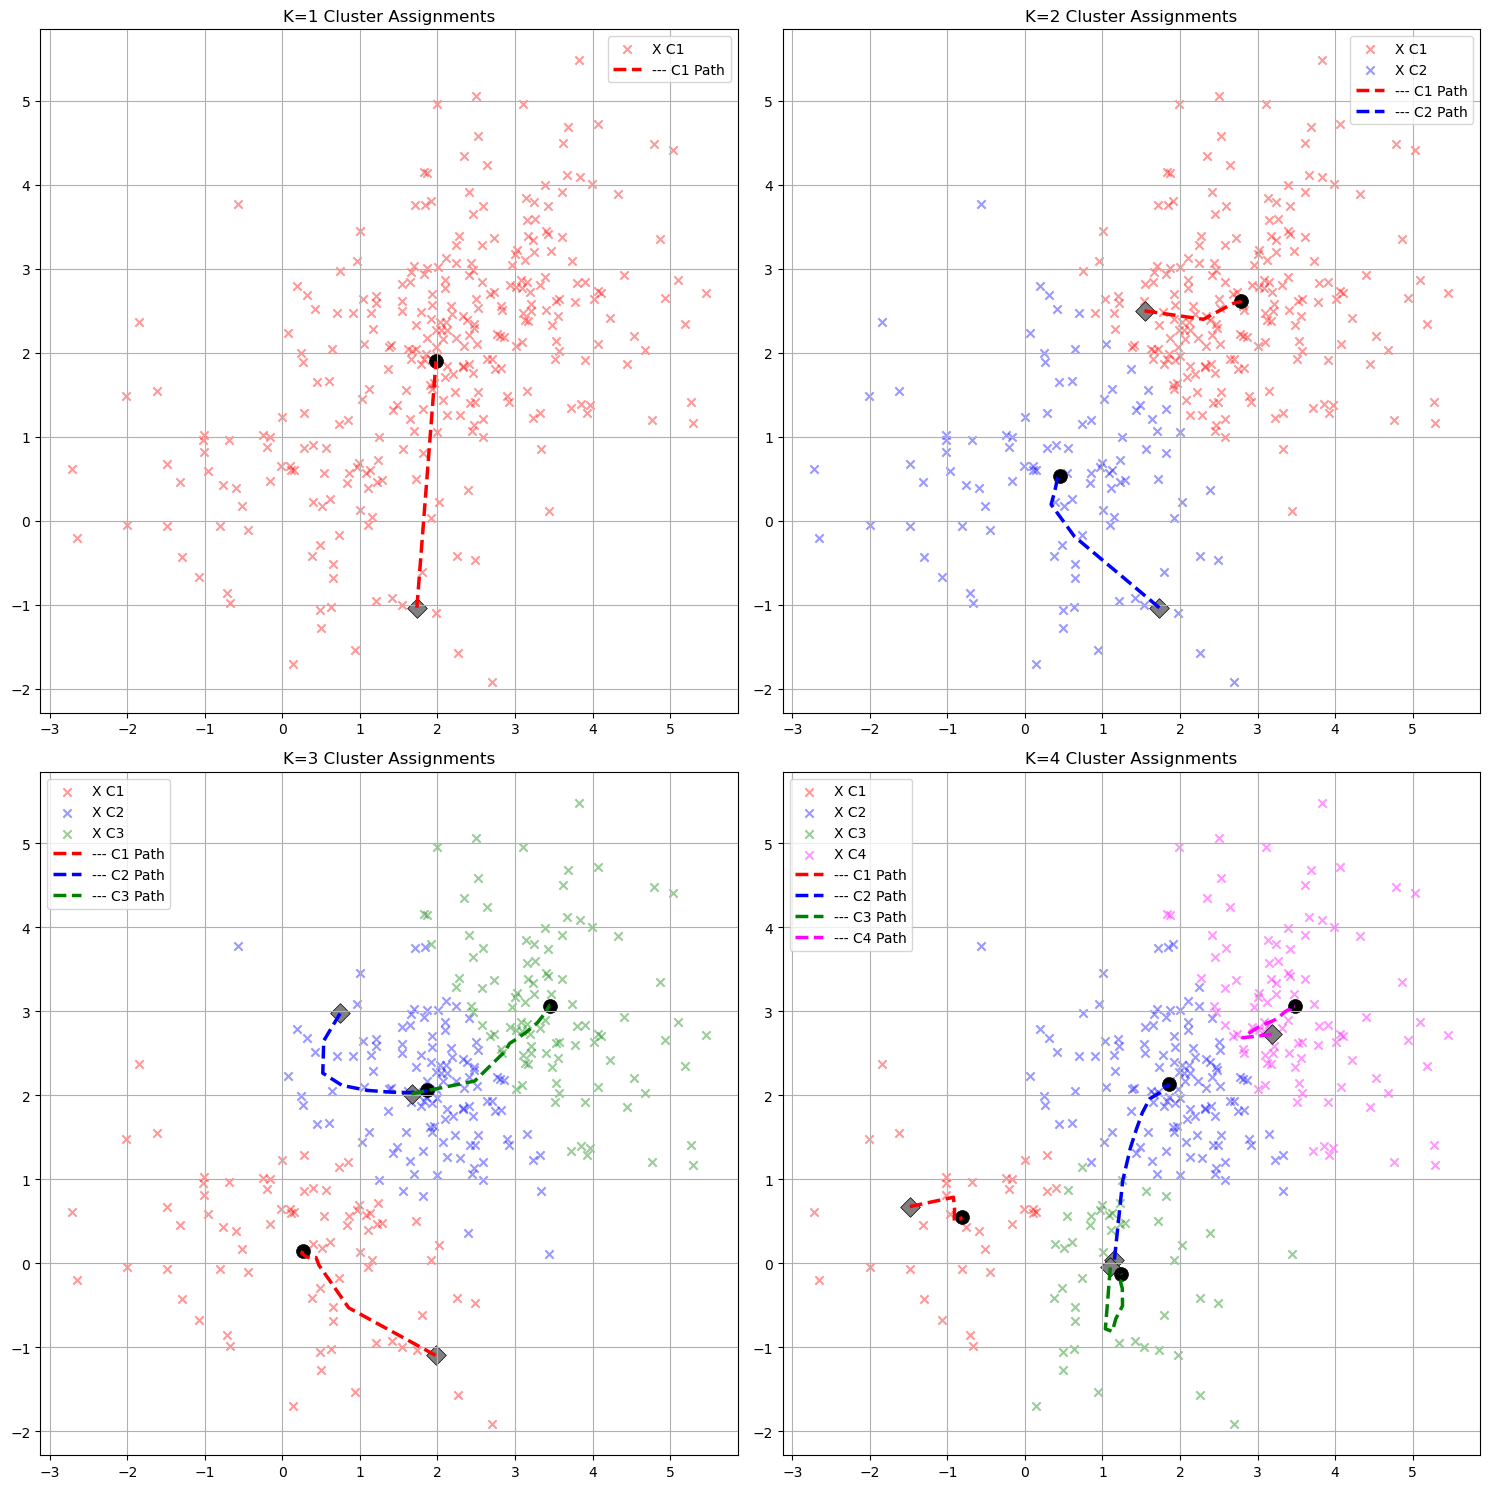

In [30]:
# --------------------------------------
# Add your P1B coding solution below.
# --------------------------------------

# Get data
data = kdf[['x', 'y']].values
n_samples = len(data)

def kmeans(data, k, max_iter=100, tolerance=0.05):
    """
    K-means function
    Returns: centroids_old, labels, final_centroids
    """
    
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    centroids_old = [centroids.copy()]
    
    prev_inertia = float('inf') # Set to infinity for the first iteration to be able to work
    
    for iteration in range(max_iter):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)) # Use direct distance
        labels = np.argmin(distances, axis=0)
        
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                new_centroids[i] = data[np.random.choice(n_samples, 1)]
        
        centroids_old.append(new_centroids.copy())
        centroids = new_centroids
        
        inertia = 0
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                inertia += ((cluster_points - centroids[i])**2).sum()
        
        if abs(inertia - prev_inertia) < tolerance:
            break
        
        prev_inertia = inertia
    
    return centroids_old, labels, centroids

colors = ['red', 'blue', 'green', 'magenta']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

k_values = [1, 2, 3, 4]
for idx, k in enumerate(k_values):
    row = idx // 2
    col = idx % 2
    ax = axs[row, col]
    
    centroids_old, labels, final_centroids = kmeans(data, k, max_iter=100, tolerance=0.05)
    
    legend_elements = []
    for i in range(k):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=colors[i], marker='x', alpha=0.4, label=f'X C{i+1}')
            legend_elements.append(scatter)
    
    for i in range(k):
        if len(centroids_old) > 1:
            path_x = [centroids_old[j][i, 0] for j in range(len(centroids_old))]
            path_y = [centroids_old[j][i, 1] for j in range(len(centroids_old))]
            line = ax.plot(path_x, path_y, '--', linewidth=2.5, alpha=1.0, c=colors[i], label=f'--- C{i+1} Path')
            legend_elements.append(line[0])
    
    initial_centroids = centroids_old[0]
    for i in range(k):
        ax.scatter(initial_centroids[i, 0], initial_centroids[i, 1], 
                  c='gray', marker='D', s=100, edgecolors='black', linewidths=0.5)
    
    for i in range(k):
        ax.scatter(final_centroids[i, 0], final_centroids[i, 1], 
                  c='black', marker='o', s=100, edgecolors='black', linewidths=0.5)
    
    ax.set_title(f'K={k} Cluster Assignments')
    ax.legend(handles=legend_elements, loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()


****

### Shape Modeling and PCA.

The provided dataframe is a $2n \times m$ matrix of face data, where the columns represent shape vectors (e.g., ${\bf f}_i$ is the column vector that represents the i<sup>th</sup> face in the dataset), and the rows represent landmarks on a $2$D human face. (<a href="https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/">Reference</a> for this data).

Specifically, the $2n$-dimension column vector ${\bf f}_1=(x_0,y_0,x_1,y_1, \ldots, x_i, y_i, \ldots, x_{n-1}, y_{n-1})$ defines $n=68$ landmark locations on face $1$ (column named **f1**) in the dataset. 

For plotting and visualization, the $2n$ vector can be easily converted to an $n \times 2$ matrix, where each row $(x_i, y_i)$ is a $2D$ point on a face.

Tips:
- The matrix decomposition and Principal Component Analysis (PCA) slides (see Canvas schedule) may be helpful.
- Principal component analysis applications.
- The 1995 published <a href="https://d1wqtxts1xzle7.cloudfront.net/32766354/Active_Shape_Models-Their_Training_and_Application_1995CVIU_-libre.pdf?1391178918=&response-content-disposition=inline%3B+filename%3DActive_Shape_Models_Their_Training_and_A.pdf&Expires=1762267168&Signature=FaJwDlw--eTpPE-~yAuvnkbvNy-PA~9oahRHvG88BR882jnAFkfhWRxpwjt7MUeTPG1uAFm7omi-YWjZ5Ykd6X9SM8oWwZubdiwsG-3PGmzbMdAE7CyDO-q5Q9IACzlG7q4LrNpjLRWEV4Y95KhlQ2bxtQBBkjQgemBytXnoSAOEZ-CHsgvguPmItWyX7OAwupd5CNmSy1wc~EdHARKFG7fHTbeaHSDKsfusEIE3YBmkDluKqUzQfPt-uHK8-zrqlk0kAYxpDzqvghvS~k7ZXRrJPoVnuVkZ8aN0-njGiGHTM7j-kOGS8pO4UaTYPV2A7vYBlMJNuaqr58zqf0vCdg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA">paper</a> (Section 3: PDM) cited 10,909 times (<a href="https://scholar.google.com/citations?user=zhlk0OsAAAAJ&hl=en">reference</a>). 

****

In [31]:
fdf = pd.read_csv("F.csv" )
fdf

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187
0,-1.000000,-1.000000,-1.000000,-1.000000,-0.951937,-0.996250,-0.962643,-0.973699,-1.000000,-1.000000,...,-0.928993,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.950060,-0.914484,-1.000000,-1.000000
1,1.000000,0.832926,0.579261,0.231897,0.565381,0.849546,0.858178,0.817682,0.729727,0.467076,...,0.648711,0.724321,0.421352,0.711271,0.694059,0.490634,0.536417,-0.350551,0.507698,0.192629
2,-0.965634,-0.970360,-0.983060,-0.952045,-1.000000,-1.000000,-1.000000,-1.000000,-0.987371,-0.920799,...,-0.980922,-0.935998,-0.910346,-0.930497,-0.987213,-0.931974,-0.970648,-0.827805,-0.919498,-0.948147
3,0.685826,0.487520,0.318358,0.015101,0.318405,0.520962,0.511738,0.573777,0.457303,0.144798,...,0.468704,0.472606,0.179666,0.394879,0.403099,0.196641,0.289123,-0.509708,0.248383,-0.064326
4,-0.950751,-0.838847,-0.969005,-0.868485,-0.998650,-0.950642,-0.973317,-0.983797,-0.953697,-0.823358,...,-1.000000,-0.876227,-0.880468,-0.920069,-0.965791,-0.841766,-0.925714,-0.758012,-0.846001,-0.902248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.626924,-0.361757,-0.318876,-0.502801,-0.363823,-0.371101,-0.203414,-0.346591,-0.456504,-0.341847,...,-0.386944,-0.500128,-0.446003,-0.425400,-0.380385,-0.503704,-0.585163,-0.215784,-0.312186,-0.374595
132,0.107520,0.113745,-0.153760,0.375983,-0.400380,0.043260,0.289086,0.090587,-0.157003,0.419915,...,-0.386670,0.402114,0.220366,0.389456,-0.008135,0.521426,-0.202704,-0.024853,0.553613,0.464788
133,-0.657572,-0.404557,-0.350701,-0.541314,-0.374537,-0.380429,-0.226528,-0.379223,-0.459393,-0.354035,...,-0.380905,-0.533512,-0.437627,-0.407400,-0.384911,-0.576235,-0.591528,-0.292822,-0.317218,-0.390096
134,0.013293,0.001258,-0.270076,0.253130,-0.501222,-0.075586,0.177918,-0.020670,-0.264473,0.290111,...,-0.489210,0.263180,0.075984,0.263974,-0.097492,0.399933,-0.287718,-0.116465,0.453454,0.403976


****

**P2A** (3 Points): Mean Face Visualization.

<img src="p2a.png" width="600" style="float: right"/>

Using the **fdf** dataframe, visualize the mean face vector ($\bar{{\bf x}}$) in a 2D scatter plot.

The mean face vector is 

$$\bar{{\bf x}} = (\bar{x}_0,\bar{y}_0,\bar{x}_1,\bar{y}_1, \ldots \bar{x}_{n-1}, \bar{y}_{n-1}),$$

where $\bar{x}_i$ or $\bar{y}_i$ is the average value for the i<sup>th</sup> landmark across all $m$ face vectors.

To receive full credit, your plotting solution must generate a scatter plot that is identical to the one provided.

**Notes**:
- **If you have questions or are unsure, you and your teammates must ask**.

You may assume:
- All the data is used to generate the scatter plot.
- The plot figure size is **8** inches in width and **8** inches in height.
- The color used to generate the plot is ``blue``.
- The default x-axis and y-axis tick values are used.
- The marker shape is **o**.
- The annotation font size is **10**.
- The plot axis is ``equal``.

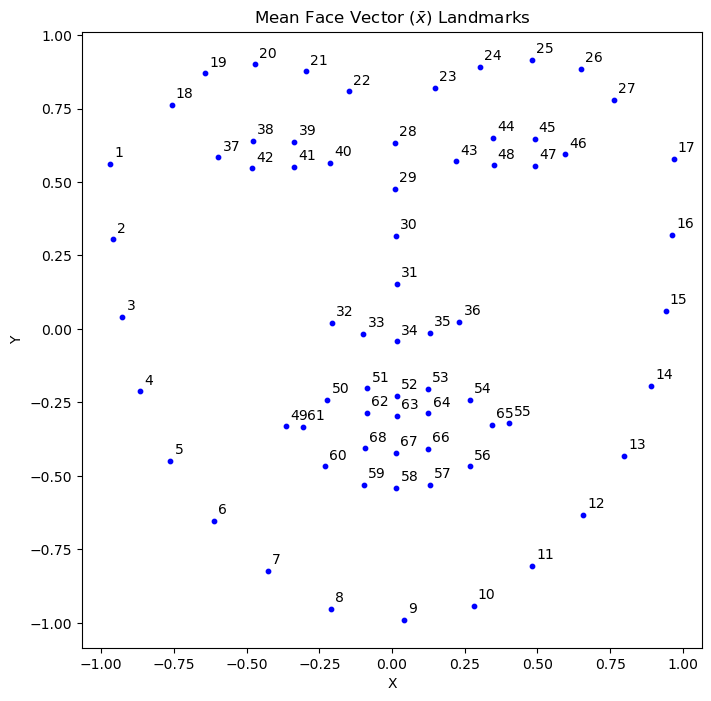

In [38]:
# --------------------------------------
# Add your P2A coding solution below.
# --------------------------------------

# Calculate mean face vector by averaging across all face vectors (columns)
mean_face = fdf.mean(axis=1).values  # Shape: (136,)

mean_face_2d = mean_face.reshape(-1, 2)  
x_coords = mean_face_2d[:, 0]  # x coordinates
y_coords = mean_face_2d[:, 1]  # y coordinates

fig, axs = plt.subplots(figsize=(8, 8))

axs.scatter(x_coords, y_coords, c='blue', marker='o', s=10)

for i in range(len(x_coords)):
    axs.annotate(str(i+1), (x_coords[i], y_coords[i]), fontsize=10, ha='left', va='bottom', xytext=(3, 3), textcoords='offset points')

axs.set_title(r'Mean Face Vector ($\bar{x}$) Landmarks')

axs.set_xlabel('X')
axs.set_ylabel('Y')


plt.show()


****

**P2B** (12 Points): PCA and Shape Modeling.

<img src="p2b.png" width="600" style="float: right"/>

Using the **fdf** dataframe and the mean shape vector ($\bar{{\bf x}}$), perform principal component analysis (PCA) and visualize the shape space.

Specifically, a new face vector ($\hat{{\bf x}}$) can be generated by

$$\hat{{\bf x}} = \bar{{\bf x}} + \textnormal{V} {\bf b},$$

where $V$ is the eigenvector matrix and ${\bf b}$ is the shape parameters vector. The eigenvector matrix ($V$) and the eigenvalue matrix ($\Lambda$) are found by performing an eigen decomposition on the covariance matrix ($\Sigma = V \Lambda V^T$). The covariance matrix can be computed using the equation below.

$$\Sigma = \frac{1}{m-1}  \sum_{i=0}^{m-1}({\bf f}_i - \bar{{\bf x}}) ({\bf f}_i - \bar{{\bf x}})^T$$

The shape parameter $b_i$ is the square root of an eigenvalue $\lambda_i$, and it can be varied between $\pm 3$ standard deviations. As shown in the reference plot, the shape parameter will be varied by $\pm 1$ and $\pm 0.5$ standard deviations. (Note: $b_1$ corresponds to the largest eigenvalue, i.e., the principal component).

Lastly, as shown in the reference plot, only one shape parameter will be varied at a time. Specifically, the top row varies only $b_1$ (the largest eigenvalue), the middle row only $b_2$ (the second-largest eigenvalue), and the bottom row only $b_3$ (the third-largest eigenvalue). The shape parameters that are not varied will be set to zero in the shape vector. 

To receive full credit, your solution should produce plots identical to the reference plots. 

**Notes**:
- The plots must be placed in a $3 \times 5$ grid pattern (see reference plots
- You **must** use Eigen decomposition (SVD is not allowed, and all points will be forfeited if used).
- **If you have questions or are unsure, you and your teammates must ask**.

You may assume:
- All the data is used to generate the scatter plots.
- The plot figure size is **9** inches in width and **9** inches in height.
- The color used to generate the plot is ``blue``.
- The default x-axis and y-axis tick values are removed (<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html">reference</a>).
- The marker shape is **.**.
- The default marker size is used.
- The plot axis is ``equal``.
- The plot uses a tight layout (<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html">reference</a>).


In [33]:
# --------------------------------------
# Add your P2B coding solution below.
# --------------------------------------











